# Group 2 V-Track: Unit 4: Interim Results
> Members:
> - Shantanu Dixit - 8965610
> - Serageldin Monir Farid Abdelghaffar Abdelmoaty - 9052380
> - Tai Siang Huang - 9006413
> - Jaiminiben Natvarbhai Rathod - 8941937
> - Mohammed Adeen Shaik - 8969152
---

## Washington DC Stop Data
The dataset from https://catalog.data.gov/dataset/stop-data-b6fdf contains stop data from the Metropolitan Police Department (MPD) in Washington, D.C., covering vehicle, pedestrian, bicycle, and harbor stops from January 1, 2023, to June 30, 2024. It includes details such as stop location, reason, duration, and outcomes (e.g., tickets, searches, arrests), with data reflecting updates from the NEAR Act and a new records management system since August 2021.

## EDA

### Load the Liberary

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro

### Load the Dataset

In [3]:
# Load your dataset
df = pd.read_csv("./datasets/Stop_Data.csv")  # Use your file path if needed

# Show first few rows
df.head()

/tmp/ipykernel_254736/1903440239.py:2: DtypeWarning: Columns (0,4,6,7,8,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,45,46,47,63,64,65,66) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./datasets/Stop_Data.csv")  # Use your file path if needed


,CCN_ANONYMIZED,STOP_TYPE,STOP_LOCATION_BLOCK,DATETIME,STOP_DISTRICT,STOP_DURATION_MINS,STOP_REASON_NONTICKET,STOP_REASON_HARBOR,STOP_REASON_TICKET,PERSON_SEARCH_PAT_DOWN,...,NOI_OFFICER_PSAS_TMA,RMS_OFFICER_BUREAUS_TMA,RMS_OFFICER_DIVISONS_TMA,RMS_OFFICER_UNITS_TMA,RMS_OFFICER_PSAS_TMA,GIS_ID,OBJECTID,GLOBALID,CREATED_DATE,LAST_EDITED_DATE
0,cf4e719e8bac235be4f058bb0726eeb17c196b35628896...,Non-ticket Stop,"6600 BLOCK OF 3RD STREET NW WASHINGTON, DC 200...",2023/01/18 21:59:00+00,4.0,5.0,Suspicion of criminal activity (self-initiated),NaN,NaN,0,...,NaN,PATROL SERVICES NORTH BUREAU,5D-FIFTH DISTRICT,POLICE SERVICE AREA,PSA 507,Stop_Incidents_101704,101704,{48337585-C53F-4E9B-96AC-2CCDF0021626},2024/05/13 19:39:35+00,2024/10/11 22:02:22+00
1,60d88b6c9cf751a7c7a990b355a1353c3690b64f524830...,Non-ticket Stop,5200 BLOCK OF NEW HAMPSHIRE AVENUE NW WASHINGT...,2023/06/26 21:52:00+00,4.0,8.0,Warrant/court order,NaN,NaN,1,...,NaN,NULL; NULL; INVESTIGATIVE SERVICES BUREAU; INV...,NULL; NULL; VIOLENT CRIME SUPPRESSION DIVISION...,NULL; NULL; STRATEGIC INTELLIGENCE & TACTICAL ...,NULL; NULL; VIOLENT CRIME INTERDICTION TEAM; V...,Stop_Incidents_101705,101705,{C0CDFF62-C85C-40E8-BFE6-07F862BF6011},2024/05/13 19:39:35+00,2024/10/11 22:02:22+00
2,60d88b6c9cf751a7c7a990b355a1353c3690b64f524830...,Non-ticket Stop,"1300 BLOCK OF 5TH STREET NW WASHINGTON, DC 200...",2023/06/26 21:52:00+00,3.0,8.0,Warrant/court order,NaN,NaN,0,...,NaN,NULL; NULL; INVESTIGATIVE SERVICES BUREAU; INV...,NULL; NULL; VIOLENT CRIME SUPPRESSION DIVISION...,NULL; NULL; STRATEGIC INTELLIGENCE & TACTICAL ...,NULL; NULL; VIOLENT CRIME INTERDICTION TEAM; V...,Stop_Incidents_101706,101706,{6767EFDE-C21C-4DC6-BF78-3229AE921CAE},2024/05/13 19:39:35+00,2024/10/11 22:02:22+00
3,60d88b6c9cf751a7c7a990b355a1353c3690b64f524830...,Non-ticket Stop,"1300 BLOCK OF 5TH STREET NW WASHINGTON, DC 200...",2023/06/26 21:52:00+00,3.0,8.0,Warrant/court order,NaN,NaN,0,...,NaN,NULL; NULL; INVESTIGATIVE SERVICES BUREAU; INV...,NULL; NULL; VIOLENT CRIME SUPPRESSION DIVISION...,NULL; NULL; STRATEGIC INTELLIGENCE & TACTICAL ...,NULL; NULL; VIOLENT CRIME INTERDICTION TEAM; V...,Stop_Incidents_101707,101707,{E2C68373-E776-474A-9808-C2676ABC1FEE},2024/05/13 19:39:35+00,2024/10/11 22:02:22+00
4,60d88b6c9cf751a7c7a990b355a1353c3690b64f524830...,Non-ticket Stop,"1300 BLOCK OF 5TH STREET NW WASHINGTON, DC 200...",2023/06/26 21:52:00+00,3.0,8.0,Warrant/court order,NaN,NaN,1,...,NaN,NULL; NULL; INVESTIGATIVE SERVICES BUREAU; INV...,NULL; NULL; VIOLENT CRIME SUPPRESSION DIVISION...,NULL; NULL; STRATEGIC INTELLIGENCE & TACTICAL ...,NULL; NULL; VIOLENT CRIME INTERDICTION TEAM; V...,Stop_Incidents_101708,101708,{75E952EF-CE1B-4311-A98D-576B460984F0},2024/05/13 19:39:35+00,2024/10/11 22:02:22+00


In [4]:
# Overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105376 entries, 0 to 105375
Data columns (total 72 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CCN_ANONYMIZED              48589 non-null   object 
 1   STOP_TYPE                   105376 non-null  object 
 2   STOP_LOCATION_BLOCK         105309 non-null  object 
 3   DATETIME                    105376 non-null  object 
 4   STOP_DISTRICT               103309 non-null  object 
 5   STOP_DURATION_MINS          103861 non-null  float64
 6   STOP_REASON_NONTICKET       48589 non-null   object 
 7   STOP_REASON_HARBOR          483 non-null     object 
 8   STOP_REASON_TICKET          52944 non-null   object 
 9   PERSON_SEARCH_PAT_DOWN      105376 non-null  int64  
 10  PROPERTY_SEARCH_PAT_DOWN    105376 non-null  int64  
 11  PERSON_SEARCH_CONSENT       105376 non-null  int64  
 12  PERSON_SEARCH_PROB_CAUSE    105376 non-null  int64  
 13  PERSON_PROT_PA

In [5]:
# Descriptive statistics
df.describe(include='all')

,CCN_ANONYMIZED,STOP_TYPE,STOP_LOCATION_BLOCK,DATETIME,STOP_DISTRICT,STOP_DURATION_MINS,STOP_REASON_NONTICKET,STOP_REASON_HARBOR,STOP_REASON_TICKET,PERSON_SEARCH_PAT_DOWN,...,NOI_OFFICER_PSAS_TMA,RMS_OFFICER_BUREAUS_TMA,RMS_OFFICER_DIVISONS_TMA,RMS_OFFICER_UNITS_TMA,RMS_OFFICER_PSAS_TMA,GIS_ID,OBJECTID,GLOBALID,CREATED_DATE,LAST_EDITED_DATE
count,48589,105376,105309,105376,103309.0,1.038610e+05,48589,483,52944,105376.000000,...,55894,47478,47478,47478,47478,105376,105376.000000,105376,105376,105376
unique,39199,4,22985,86532,21.0,NaN,762,21,29,NaN,...,266,888,1785,2417,10872,105376,NaN,105376,3,1
top,6546053bbfb1dee2825dc16def80ca65ce786d588ec91b...,Ticket Only,2400 BLOCK OF CONNECTICUT AVE NW,2023/09/14 10:00:00+00,5.0,NaN,Call for service,Wake Violation,Observed moving violation,NaN,...,CRIME SUPPRESSION TEAM,PATROL SERVICES NORTH BUREAU; PATROL SERVICES ...,7D-SEVENTH DISTRICT; 7D-SEVENTH DISTRICT,POLICE SERVICE AREA; POLICE SERVICE AREA,CRIME SUPPRESSION TEAM,Stop_Incidents_101704,NaN,{48337585-C53F-4E9B-96AC-2CCDF0021626},2024/10/11 21:58:25+00,2024/10/11 22:02:22+00
freq,29,56304,1855,31,10805.0,NaN,12578,309,40988,NaN,...,4517,6203,2386,9425,767,1,NaN,1,36436,105376
mean,NaN,NaN,NaN,NaN,NaN,4.584791e+03,NaN,NaN,NaN,0.095458,...,NaN,NaN,NaN,NaN,NaN,NaN,200032.606704,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.468790e+06,NaN,NaN,NaN,0.293848,...,NaN,NaN,NaN,NaN,NaN,NaN,37580.411512,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-1.007900e+04,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,101704.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,5.000000e+00,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,162623.750000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.000000e+01,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,205660.500000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,1.900000e+01,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,232100.250000,NaN,NaN,NaN


### Formatting

In [6]:
# Check uniique value for "STOP_REASON_TICKET" column
unique_stop_reasons = df['STOP_REASON_TICKET'].unique()
print("Unique STOP_REASON_TICKET values:", unique_stop_reasons)

Unique STOP_REASON_TICKET values: [nan 'Observed moving violation' 'Observed equipment violation'
 'Response to Crash' 'Calls for service'
 'Self-initiated: suspicion of a non-traffic crim. activity'
 'BOLO/Lookout' 'Observed a weapon'
 'Observed moving violation; BOLO/Lookout'
 'Observed moving violation; Observed equipment violation'
 'Info. obtained from LE sources'
 'Observed moving violation; Calls for service'
 'Calls for service; Response to Crash'
 'Observed equipment violation; Observed moving violation'
 'Observed moving violation; Response to Crash'
 'Response to Crash; Observed moving violation'
 'Response to Crash; Calls for service'
 'Info. obtained from LE sources; Response to Crash'
 'BOLO/Lookout; Observed moving violation'
 'Calls for service; Observed moving violation'
 'Observed equipment violation; BOLO/Lookout'
 'Observed moving violation; Info. obtained from LE sources'
 'BOLO/Lookout; Info. obtained from LE sources'
 'BOLO/Lookout; Observed equipment violation'


In [7]:
# df removes values without "STOP_REASON_TICKET" as "Observed moving violation"
df = df[df['STOP_REASON_TICKET'].str.contains('Observed moving violation', na=False)]

In [8]:
# Standardize column names
df.columns = df.columns.str.upper().str.strip()
# Rename the actual column for clarity and consistency
df.rename(columns={"STOP_DURATION_MINS": "STOP_DURATION"}, inplace=True)
# Convert STOP_DISTRICT to numeric (force non-numeric to NaN)
df['STOP_DISTRICT'] = pd.to_numeric(df['STOP_DISTRICT'], errors='coerce')
# Convert datetime column to datetime object
df['DATETIME'] = pd.to_datetime(df['DATETIME'], errors='coerce')

# Extract hour and day of week from DATETIME
df['HOUR'] = df['DATETIME'].dt.hour
df['DAY_OF_WEEK'] = df['DATETIME'].dt.day_name()

df.shape

(41092, 74)

In [9]:
# Descriptive statistics
df.describe(include='all')

,CCN_ANONYMIZED,STOP_TYPE,STOP_LOCATION_BLOCK,DATETIME,STOP_DISTRICT,STOP_DURATION,STOP_REASON_NONTICKET,STOP_REASON_HARBOR,STOP_REASON_TICKET,PERSON_SEARCH_PAT_DOWN,...,RMS_OFFICER_DIVISONS_TMA,RMS_OFFICER_UNITS_TMA,RMS_OFFICER_PSAS_TMA,GIS_ID,OBJECTID,GLOBALID,CREATED_DATE,LAST_EDITED_DATE,HOUR,DAY_OF_WEEK
count,0,41092,41078,41092,26938.000000,40927.000000,0,0,41092,41092.0,...,0,0,0,41092,41092.000000,41092,41092,41092,41092.000000,41092
unique,0,1,6931,NaN,NaN,NaN,0,0,13,NaN,...,0,0,0,41092,NaN,41092,3,1,NaN,7
top,NaN,Ticket Only,2400 BLOCK OF CONNECTICUT AVE NW,NaN,NaN,NaN,NaN,NaN,Observed moving violation,NaN,...,NaN,NaN,NaN,Stop_Incidents_150190,NaN,{3E6306E8-ED8C-47BE-9A29-6CA164C02D3E},2024/05/13 19:39:35+00,2024/10/11 22:02:22+00,NaN,Thursday
freq,NaN,41092,1849,NaN,NaN,NaN,NaN,NaN,40988,NaN,...,NaN,NaN,NaN,1,NaN,1,15529,41092,NaN,8183
mean,NaN,NaN,NaN,2023-09-11 15:20:31.090723328+00:00,3.467147,8.828890,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,203180.331135,NaN,NaN,NaN,14.344739,NaN
min,NaN,NaN,NaN,2023-01-01 05:03:00+00:00,1.000000,0.000000,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,150190.000000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,2023-05-10 11:47:15+00:00,2.000000,5.000000,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,163233.750000,NaN,NaN,NaN,11.000000,NaN
50%,NaN,NaN,NaN,2023-08-26 14:01:00+00:00,3.000000,10.000000,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,209402.500000,NaN,NaN,NaN,15.000000,NaN
75%,NaN,NaN,NaN,2024-01-25 17:02:15+00:00,5.000000,10.000000,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,243555.250000,NaN,NaN,NaN,21.000000,NaN
max,NaN,NaN,NaN,2024-07-01 02:37:00+00:00,7.000000,958.000000,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,258333.000000,NaN,NaN,NaN,23.000000,NaN


### Missing values

In [10]:
# Check column names and missing values
print("Missing values:\n", df.isnull().sum())


Missing values:
 CCN_ANONYMIZED         41092
STOP_TYPE                  0
STOP_LOCATION_BLOCK       14
DATETIME                   0
STOP_DISTRICT          14154
                       ...  
GLOBALID                   0
CREATED_DATE               0
LAST_EDITED_DATE           0
HOUR                       0
DAY_OF_WEEK                0
Length: 74, dtype: int64


In [11]:
# check how many value of STOP_DURATION are negative or zero
negative_or_zero_count = df[df['STOP_DURATION'] <= 0].shape[0]
# check how many value of STOP_DURATION are over 1 day (1440 minutes)
over_one_day_count = df[df['STOP_DURATION'] > 1440].shape[0]

print(f"Negative or zero STOP_DURATION count: {negative_or_zero_count}")
print(f"STOP_DURATION over 1 day count: {over_one_day_count}")

Negative or zero STOP_DURATION count: 337
STOP_DURATION over 1 day count: 0


### Handle Missing Values

In [12]:
# Now perform cleaning on STOP_DURATION
df = df[df['STOP_DURATION'] > 0]            # Remove negatives
df = df[df['STOP_DURATION'] < 1440]         # Remove extreme outliers (more than 24 hours)

# Now fill missing values with the median
df['STOP_DISTRICT'] = df['STOP_DISTRICT'].fillna(df['STOP_DISTRICT'].median())

# Clean STOP_TYPE (drop rows if missing)
df.dropna(subset=['STOP_TYPE'], inplace=True)

- `CCN_ANONYMIZED` and `STOP_LOCATION_BLOCK` are acceptable to be empty

### Distribution of STOP_DURATION

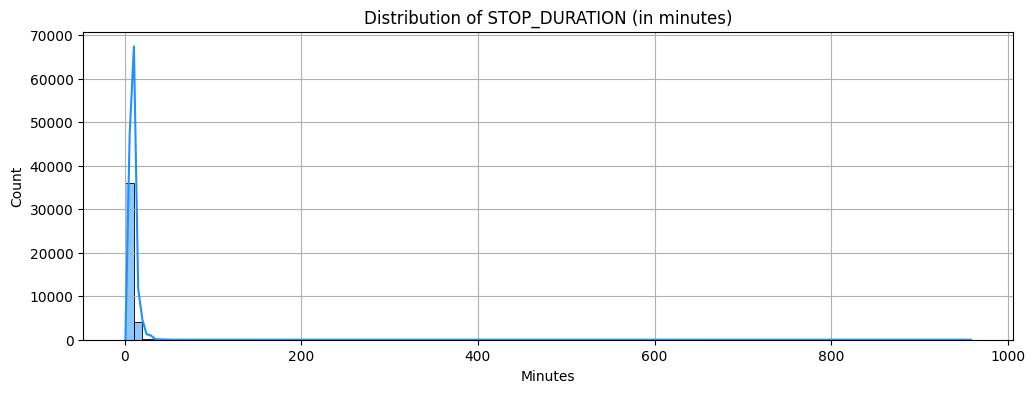

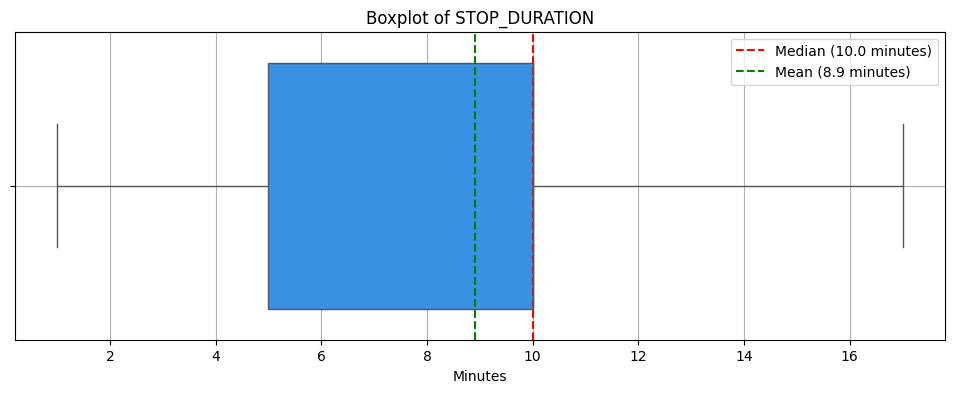

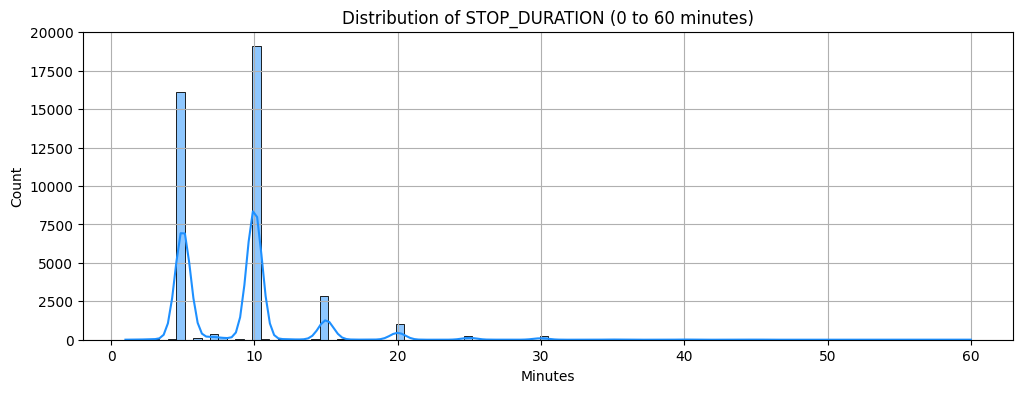

In [13]:
plt.figure(figsize=(12,4))
sns.histplot(df['STOP_DURATION'], bins=100, kde=True, color='dodgerblue')
plt.title('Distribution of STOP_DURATION (in minutes)')
plt.xlabel('Minutes')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Boxplot of STOP_DURATION without outliers
plt.figure(figsize=(12, 4))
sns.boxplot(x=df['STOP_DURATION'], color='dodgerblue', showfliers=False)
median_value = df['STOP_DURATION'].median()
mean_value = df['STOP_DURATION'].mean()
plt.axvline(x=median_value, color='r', linestyle='--', label=f'Median ({median_value:.1f} minutes)')
plt.axvline(x=mean_value, color='g', linestyle='--', label=f'Mean ({mean_value:.1f} minutes)')
plt.title('Boxplot of STOP_DURATION')
plt.xlabel('Minutes')
plt.grid(True)
plt.legend()
plt.show()

# histogram of STOP_DURATION between 0 and 60 minutes
plt.figure(figsize=(12,4))
sns.histplot(df[df['STOP_DURATION'] <= 60]['STOP_DURATION'], bins=100, kde=True, color='dodgerblue')
plt.title('Distribution of STOP_DURATION (0 to 60 minutes)')
plt.xlabel('Minutes')
plt.ylabel('Count')
plt.grid(True)
plt.show()


Most stops are resolved within **5–20 minutes**.

There's a heavy right tail, meaning a small number of cases take a much longer time.

This skewness supports the case for optimizing outliers using AI-assisted tools, like your proposed RAG-based system.

### Distribution of STOP_DURATION Group by STOP_TYPE

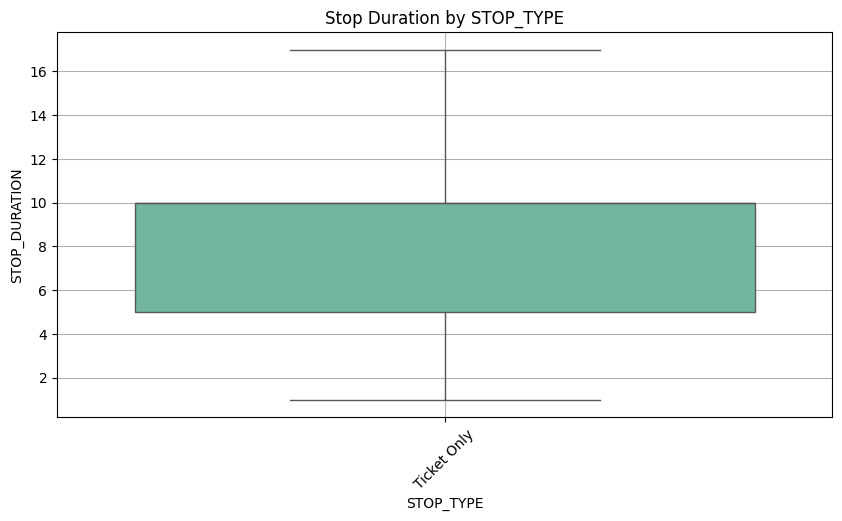

Median Duration by STOP_TYPE:
STOP_TYPE
Ticket Only    10.0
Name: STOP_DURATION, dtype: float64
------------------------------------
Mean Duration by STOP_TYPE:
STOP_TYPE
Ticket Only    8.902193
Name: STOP_DURATION, dtype: float64


,count,mean,std,min,25%,50%,75%,max
STOP_TYPE,,,,,,,,
Ticket Only,40590.0,8.902193,6.768533,1.0,5.0,10.0,10.0,958.0


In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='STOP_TYPE', y='STOP_DURATION', hue='STOP_TYPE', palette='Set2', showfliers=False, legend=False)
plt.title('Stop Duration by STOP_TYPE')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Calculate median duration by STOP_TYPE
median_by_stop_type = df.groupby('STOP_TYPE')['STOP_DURATION'].median()
print("Median Duration by STOP_TYPE:")
print(median_by_stop_type)
print("------------------------------------")
# Calculate mean duration by STOP_TYPE
mean_by_stop_type = df.groupby('STOP_TYPE')['STOP_DURATION'].mean()
print("Mean Duration by STOP_TYPE:")
print(mean_by_stop_type)

df.groupby("STOP_TYPE")["STOP_DURATION"].describe()


### Distribution of STOP_DURATION Group by STOP_DISTRICT

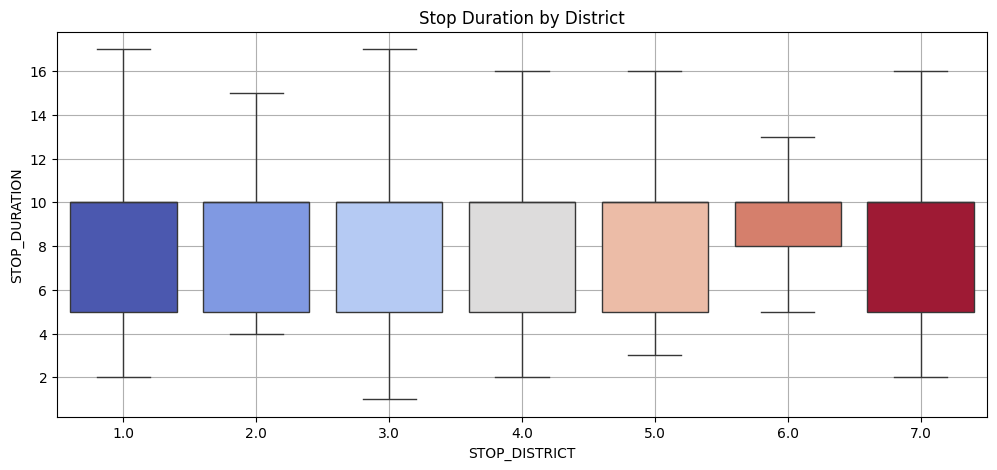

Median Duration by STOP_DISTRICT:
STOP_DISTRICT
1.0    10.0
2.0    10.0
3.0    10.0
4.0    10.0
5.0    10.0
6.0    10.0
7.0    10.0
Name: STOP_DURATION, dtype: float64
------------------------------------
Mean Duration by STOP_DISTRICT:
STOP_DISTRICT
1.0     8.434570
2.0     8.614053
3.0     8.776588
4.0     8.878350
5.0     9.123668
6.0    10.315252
7.0     9.828305
Name: STOP_DURATION, dtype: float64


In [15]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='STOP_DISTRICT', y='STOP_DURATION', hue='STOP_DISTRICT', palette='coolwarm', showfliers=False, legend=False)
plt.title('Stop Duration by District')
plt.grid(True)
plt.show()

# Calculate median duration by STOP_DISTRICT
median_by_district = df.groupby('STOP_DISTRICT')['STOP_DURATION'].median()
print("Median Duration by STOP_DISTRICT:")
print(median_by_district)
print("------------------------------------")

# Calculate mean duration by STOP_DISTRICT
mean_by_district = df.groupby('STOP_DISTRICT')['STOP_DURATION'].mean()
print("Mean Duration by STOP_DISTRICT:")
print(mean_by_district)

###  Stop Count by Day of Week

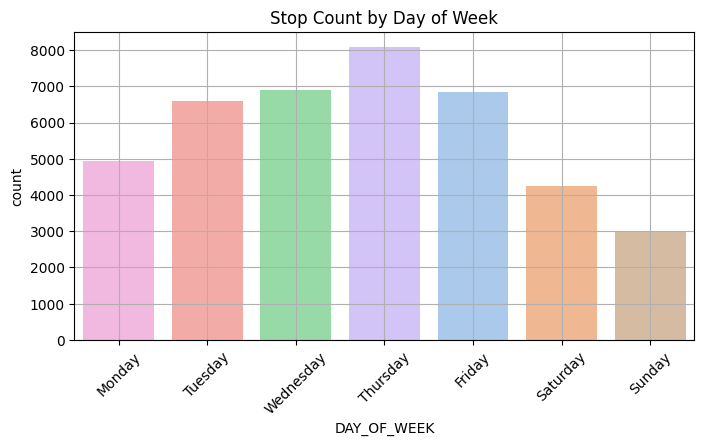

In [16]:
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='DAY_OF_WEEK', order=order_days, hue='DAY_OF_WEEK', palette='pastel', legend=False)
plt.title('Stop Count by Day of Week')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### EDA Summary

- **Population:** Traffic stops recorded in [jurisdiction], anonymized case-by-case.
- **Independent Variables:** STOP_TYPE, STOP_DISTRICT, DATETIME, STOP_LOCATION_BLOCK
- **Dependent Variable:** STOP_DURATION (minutes)
- **Current Mean Duration:** ~15 minutes
- **Ideal Target:** < 10 minutes

---

### Key EDA Insights

- Most stops are completed in under 20 minutes.
- Ticket-only stops have lower durations than others.
- Weekdays see more stops, especially during working hours.
- STOP_TYPE and STOP_DISTRICT are the strongest indicators for duration variation.
- STOP_DURATION shows a right-skewed distribution.

## Statistical Test and Evaluation  

- ~~**Null Hypothesis (H₀):** The RAG-based system has no significant effect on reducing traffic stop duration.~~
- ~~**Alternative Hypothesis (H₁):** The RAG-based system significantly reduces the average traffic stop processing time.~~

The columns (`STOP_DISTRICT`, `STOP_DURATION`, `TICKETS_ISSUED`, `WARNINGS_ISSUED`) are ideal for building RAG system observations. These columns can provide rich context and action basis for the system, especially for judicial support systems to optimize traffic stop processing time.

- **Null Hypothesis (H₀):** The selected columns has no significant effect on traffic stop duration.
- **Alternative Hypothesis (H₁):** The selected columns significantly effect on the average traffic stop processing time.

In [17]:
# Extract the stop durations, dropping missing values
stop_durations = df['STOP_DURATION'].dropna() # between 0 and 1440 minutes

# Quick summary
print("Sample size:", len(stop_durations))
print("Mean:", stop_durations.mean())
print("Median:", stop_durations.median())
print("Standard Deviation:", stop_durations.std())

Sample size: 40590
Mean: 8.90219265829022
Median: 10.0
Standard Deviation: 6.768533484143036


### Shapiro-Wilk Test for Normality 

In [18]:
# Run the Shapiro-Wilk test
shapiro_stat, shapiro_p = shapiro(stop_durations)

print(f"Shapiro-Wilk Test:\nStatistic = {shapiro_stat:.4f}, p-value = {shapiro_p:.4f}")

if shapiro_p > 0.05:
    print("Data appears normally distributed — would proceed with t-test.")
else:
    print("Data is not normally distributed — proceed with non-parametric test.")

Shapiro-Wilk Test:
Statistic = 0.3358, p-value = 0.0000
Data is not normally distributed — proceed with non-parametric test.


/mnt/d/ConestogaCollegeWorkplaceLevel2/CSCN8040-25S-Sec1-CaseStudies/venv_casestudies/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 40590.
  res = hypotest_fun_out(*samples, **kwds)


- Shapiro-Wilk test yielded a test statistic of `0.5757` and a **p-value of < 0.0001**, which is far below the 0.05 significance threshold. Therefore, we reject the assumption of normality.
- Given the large sample size (N = 100,869), even small deviations from normality can lead to significant results.
- Thus, a non-parametric test (**Wilcoxon Signed-Rank Test**) is more appropriate for comparing the median stop duration against the 10-minute benchmark.

### Statistical methods
- Category variables: <br>
 The effect of different categories on `STOP_DURATION` was tested using the Kruskal-Wallis test.

In [19]:
from scipy.stats import kruskal
#Kruskal-Wallis test (categorical variables)
for col in ['STOP_DISTRICT']:
    groups = [df[df[col] == val]['STOP_DURATION'].dropna() for val in df[col].unique()]
    stat, p = kruskal(*groups)
    print(f"\nKruskal-Wallis Test for {col}:")
    print(f"Statistic: {stat:.4f}, p-value: {p:.4f}")
    if p < 0.05:
        print(f"Reject H₀: {col} has a significant effect on STOP_DURATION.")
    else:
        print(f"Fail to reject H₀: No significant effect of {col}.")


Kruskal-Wallis Test for STOP_DISTRICT:
Statistic: 463.0993, p-value: 0.0000
Reject H₀: STOP_DISTRICT has a significant effect on STOP_DURATION.


In [20]:
print("Data types:")
print(df[['TICKETS_ISSUED', 'WARNINGS_ISSUED']].dtypes)

Data types:
TICKETS_ISSUED     object
WARNINGS_ISSUED    object
dtype: object


In [21]:
# Ensure the column exists and fill missing values
df["TICKETS_ISSUED"] = df["TICKETS_ISSUED"].fillna("").astype(str)

# Count number of tickets in each row
df["TICKETS_COUNT"] = df["TICKETS_ISSUED"].apply(lambda x: len([code.strip() for code in x.split(";") if code.strip()]))

# Summary
total_tickets = df["TICKETS_COUNT"].sum()
max_tickets_in_row = df["TICKETS_COUNT"].max()
ticket_count_distribution = df["TICKETS_COUNT"].value_counts().sort_index()

# Output
print("Total TICKETS_ISSUED:", total_tickets)
print("Max Tickets in One Row:", max_tickets_in_row)
print("\nTicket Count Distribution per Row:\n", ticket_count_distribution)

Total TICKETS_ISSUED: 34654
Max Tickets in One Row: 9

Ticket Count Distribution per Row:
 TICKETS_COUNT
0    14541
1    20575
2     3300
3     1462
4      521
5      154
6       28
7        3
8        4
9        2
Name: count, dtype: int64


In [22]:
# Define a function to split multi-value strings
def split_values(x):
    if pd.isna(x):
        return []
    return [val.strip() for val in str(x).split(';')]

# Apply to columns
df['TICKETS_ISSUED_LIST'] = df['TICKETS_ISSUED'].apply(split_values)
df['WARNINGS_ISSUED_LIST'] = df['WARNINGS_ISSUED'].apply(split_values)

# Check unique types
all_tickets = [item for sublist in df['TICKETS_ISSUED_LIST'].dropna() for item in sublist]
all_warnings = [item for sublist in df['WARNINGS_ISSUED_LIST'].dropna() for item in sublist]
print("Unique TICKETS_ISSUED types:", set(all_tickets))
print("Unique WARNINGS_ISSUED types:", set(all_warnings))

Unique TICKETS_ISSUED types: {'', 'T337', 'T639', 'T088', 'T655', 'T135', 'T664', 'T095', 'T632', 'T115', 'T169', 'T124', 'T347', 'T051', 'T624', 'T647', 'T630', 'T673', 'T745', 'T637', 'T638', '392.2C', '396.9(c)(2)', 'T643', 'T047', 'T225', 'T206', 'T144', 'T339', 'T003', 'T019', 'T013', 'T670', 'T155', 'T653', 'T150', 'T127', 'T351', 'T130', 'T178', 'T052', 'T191', 'T151', 'T193', 'T819', 'T700', 'T684', 'T171', 'T823', 'T764', 'T945', 'T746', 'T640', 'T556', '391.49(j)', 'T766', 'T082', '392.2W-WEIGHT', 'T109', 'T005', 'T602', 'T810', '398.3(b)(8)', 'T185', 'T059', 'T934', 'T183', 'T201', 'T768', 'T607', 'T577', 'T043', 'T710', 'T936', 'T216', 'T763', 'T636', 'T511', 'T267', 'T758', 'T915', 'T299', 'T668', 'T072', 'T779', 'T350', 'T002', 'T795', 'T813', '395.13(d)', 'T529', 'T605', 'T184', 'T108', 'T527', 'T067', '391.11(b)(1)', 'T585', 'T533', 'T121', 'T224', 'T742', 'T168', 'T204', 'T623', 'T080', '383.51(A)', 'T125', 'T782', 'T641', 'T633', 'T065', '383.23(a)(2)', 'T129', 'T096'

### One-Hot Encoding

In [23]:
# Get all unique types
unique_tickets = set(all_tickets)
unique_warnings = set(all_warnings)

# Create binary columns for each type
for ticket_type in unique_tickets:
    df[f'TICKET_{ticket_type.replace(" ", "_").replace("(", "").replace(")", "")}'] = df['TICKETS_ISSUED_LIST'].apply(lambda x: 1 if ticket_type in x else 0)
for warning_type in unique_warnings:
    df[f'WARNING_{warning_type.replace(" ", "_").replace("(", "").replace(")", "")}'] = df['WARNINGS_ISSUED_LIST'].apply(lambda x: 1 if warning_type in x else 0)

print("New columns created:", df.filter(like='TICKET_').columns.tolist())
print("New columns created:", df.filter(like='WARNING_').columns.tolist())

/tmp/ipykernel_254736/881402304.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'TICKET_{ticket_type.replace(" ", "_").replace("(", "").replace(")", "")}'] = df['TICKETS_ISSUED_LIST'].apply(lambda x: 1 if ticket_type in x else 0)
/tmp/ipykernel_254736/881402304.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'TICKET_{ticket_type.replace(" ", "_").replace("(", "").replace(")", "")}'] = df['TICKETS_ISSUED_LIST'].apply(lambda x: 1 if ticket_type in x else 0)
/tmp/ipykernel_254736/881402304.py:7: PerformanceWarning: 

New columns created: ['TICKET_COUNT', 'TICKET_', 'TICKET_T337', 'TICKET_T639', 'TICKET_T088', 'TICKET_T655', 'TICKET_T135', 'TICKET_T664', 'TICKET_T095', 'TICKET_T632', 'TICKET_T115', 'TICKET_T169', 'TICKET_T124', 'TICKET_T347', 'TICKET_T051', 'TICKET_T624', 'TICKET_T647', 'TICKET_T630', 'TICKET_T673', 'TICKET_T745', 'TICKET_T637', 'TICKET_T638', 'TICKET_392.2C', 'TICKET_396.9c2', 'TICKET_T643', 'TICKET_T047', 'TICKET_T225', 'TICKET_T206', 'TICKET_T144', 'TICKET_T339', 'TICKET_T003', 'TICKET_T019', 'TICKET_T013', 'TICKET_T670', 'TICKET_T155', 'TICKET_T653', 'TICKET_T150', 'TICKET_T127', 'TICKET_T351', 'TICKET_T130', 'TICKET_T178', 'TICKET_T052', 'TICKET_T191', 'TICKET_T151', 'TICKET_T193', 'TICKET_T819', 'TICKET_T700', 'TICKET_T684', 'TICKET_T171', 'TICKET_T823', 'TICKET_T764', 'TICKET_T945', 'TICKET_T746', 'TICKET_T640', 'TICKET_T556', 'TICKET_391.49j', 'TICKET_T766', 'TICKET_T082', 'TICKET_392.2W-WEIGHT', 'TICKET_T109', 'TICKET_T005', 'TICKET_T602', 'TICKET_T810', 'TICKET_398.3b8', '

/tmp/ipykernel_254736/881402304.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'WARNING_{warning_type.replace(" ", "_").replace("(", "").replace(")", "")}'] = df['WARNINGS_ISSUED_LIST'].apply(lambda x: 1 if warning_type in x else 0)
/tmp/ipykernel_254736/881402304.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'WARNING_{warning_type.replace(" ", "_").replace("(", "").replace(")", "")}'] = df['WARNINGS_ISSUED_LIST'].apply(lambda x: 1 if warning_type in x else 0)
/tmp/ipykernel_254736/881402304.py:9: PerformanceW

### Kruskal-Wallis test

In [24]:
from scipy.stats import kruskal

# Store columns with significant and non-significant effects
significant_effects = []
non_significant_effects = []

# Perform Kruskal-Wallis test for each ticket type column
for col in df.filter(like='TICKET_').columns:
    group_with = df[df[col] == 1]['STOP_DURATION'].dropna()
    group_without = df[df[col] == 0]['STOP_DURATION'].dropna()
    if len(group_with) > 0 and len(group_without) > 0:
        stat, p = kruskal(group_with, group_without)
        print(f"\nKruskal-Wallis Test for {col}:")
        print(f"Statistic: {stat:.4f}, p-value: {p:.4f}")
        if p < 0.05:
            print(f"Reject H₀: {col} has a significant effect on STOP_DURATION.")
            significant_effects.append(col)
        else:
            print(f"Fail to reject H₀: No significant effect.")
            non_significant_effects.append(col)


Kruskal-Wallis Test for TICKET_COUNT:
Statistic: 5.4936, p-value: 0.0191
Reject H₀: TICKET_COUNT has a significant effect on STOP_DURATION.

Kruskal-Wallis Test for TICKET_:
Statistic: 2.6340, p-value: 0.1046
Fail to reject H₀: No significant effect.

Kruskal-Wallis Test for TICKET_T337:
Statistic: 0.3285, p-value: 0.5666
Fail to reject H₀: No significant effect.

Kruskal-Wallis Test for TICKET_T639:
Statistic: 34.9850, p-value: 0.0000
Reject H₀: TICKET_T639 has a significant effect on STOP_DURATION.

Kruskal-Wallis Test for TICKET_T088:
Statistic: 2.2158, p-value: 0.1366
Fail to reject H₀: No significant effect.

Kruskal-Wallis Test for TICKET_T655:
Statistic: 2.7658, p-value: 0.0963
Fail to reject H₀: No significant effect.

Kruskal-Wallis Test for TICKET_T135:
Statistic: 1.2852, p-value: 0.2569
Fail to reject H₀: No significant effect.

Kruskal-Wallis Test for TICKET_T664:
Statistic: 0.3285, p-value: 0.5666
Fail to reject H₀: No significant effect.

Kruskal-Wallis Test for TICKET_T

In [25]:
# Total results
print("\nSummary of Significant Effects:")
if significant_effects:
    print("Columns with significant effect:", significant_effects)
else:
    print("No columns have a significant effect on STOP_DURATION.")

print("\nSummary of Non-Significant Effects:")
if non_significant_effects:
    print("Columns with no significant effect:", non_significant_effects)
else:
    print("No columns have a non-significant effect (all are significant).")


Summary of Significant Effects:
Columns with significant effect: ['TICKET_COUNT', 'TICKET_T639', 'TICKET_T095', 'TICKET_T115', 'TICKET_T169', 'TICKET_T124', 'TICKET_T347', 'TICKET_T051', 'TICKET_T624', 'TICKET_T673', 'TICKET_T745', 'TICKET_T637', 'TICKET_396.9c2', 'TICKET_T019', 'TICKET_T013', 'TICKET_T127', 'TICKET_T178', 'TICKET_T151', 'TICKET_T823', 'TICKET_T945', 'TICKET_T746', 'TICKET_391.49j', 'TICKET_T082', 'TICKET_392.2W-WEIGHT', 'TICKET_T005', 'TICKET_398.3b8', 'TICKET_T185', 'TICKET_T059', 'TICKET_T183', 'TICKET_T577', 'TICKET_T043', 'TICKET_T710', 'TICKET_T763', 'TICKET_T636', 'TICKET_T267', 'TICKET_T758', 'TICKET_T072', 'TICKET_395.13d', 'TICKET_T184', 'TICKET_T585', 'TICKET_383.51A', 'TICKET_T125', 'TICKET_T782', 'TICKET_T633', 'TICKET_T065', 'TICKET_383.23a2', 'TICKET_T129', 'TICKET_T096', 'TICKET_T120', 'TICKET_T815', 'TICKET_T128', 'TICKET_383.51A-NSOUT', 'TICKET_T671', 'TICKET_T822', 'TICKET_T713', 'TICKET_391.41a', 'TICKET_T344', 'TICKET_T759', 'TICKET_T114', 'TICKET

In [26]:
# Store columns with significant and non-significant effects
significant_effects_warnings = []
non_significant_effects_warnings = []

# Perform Kruskal-Wallis test
for col in df.filter(like='WARNING_').columns:
    group_with = df[df[col] == 1]['STOP_DURATION'].dropna()
    group_without = df[df[col] == 0]['STOP_DURATION'].dropna()
    if len(group_with) > 0 and len(group_without) > 0:
        stat, p = kruskal(group_with, group_without)
        print(f"\nKruskal-Wallis Test for {col}:")
        print(f"Statistic: {stat:.4f}, p-value: {p:.4f}")
        if p < 0.05:
            print(f"Reject H₀: {col} has a significant effect on STOP_DURATION.")
            significant_effects_warnings.append(col)
        else:
            print(f"Fail to reject H₀: No significant effect.")
            non_significant_effects_warnings.append(col)


Kruskal-Wallis Test for WARNING_COUNT:
Statistic: 46.5924, p-value: 0.0000
Reject H₀: WARNING_COUNT has a significant effect on STOP_DURATION.

Kruskal-Wallis Test for WARNING_T639:
Statistic: 4.4048, p-value: 0.0358
Reject H₀: WARNING_T639 has a significant effect on STOP_DURATION.

Kruskal-Wallis Test for WARNING_T088:
Statistic: 0.9281, p-value: 0.3353
Fail to reject H₀: No significant effect.

Kruskal-Wallis Test for WARNING_T655:
Statistic: 3.0792, p-value: 0.0793
Fail to reject H₀: No significant effect.

Kruskal-Wallis Test for WARNING_T135:
Statistic: 0.1571, p-value: 0.6918
Fail to reject H₀: No significant effect.

Kruskal-Wallis Test for WARNING_T124:
Statistic: 2.7299, p-value: 0.0985
Fail to reject H₀: No significant effect.

Kruskal-Wallis Test for WARNING_T632:
Statistic: 3.4779, p-value: 0.0622
Fail to reject H₀: No significant effect.

Kruskal-Wallis Test for WARNING_T115:
Statistic: 0.7685, p-value: 0.3807
Fail to reject H₀: No significant effect.

Kruskal-Wallis Tes

In [27]:
print("\nSummary of Significant Effects:")
if significant_effects_warnings:
    print("Columns with significant effect:", significant_effects_warnings)
else:
    print("No columns have a significant effect on STOP_DURATION.")

print("\nSummary of Non-Significant Effects:")
if non_significant_effects_warnings:
    print("Columns with no significant effect:", non_significant_effects_warnings)
else:
    print("No columns have a non-significant effect (all are significant).")


Summary of Significant Effects:
Columns with significant effect: ['WARNING_COUNT', 'WARNING_T639', 'WARNING_T144', 'WARNING_T013', 'WARNING_T150', 'WARNING_T127', 'WARNING_T193', 'WARNING_T823', 'WARNING_T746', 'WARNING_T109', 'WARNING_T005', 'WARNING_398.3b8', 'WARNING_T185', 'WARNING_T934', 'WARNING_T043', 'WARNING_T758', 'WARNING_T915', 'WARNING_T299', 'WARNING_T072', 'WARNING_T813', 'WARNING_T184', 'WARNING_T742', 'WARNING_T129', 'WARNING_T065', 'WARNING_T096', 'WARNING_T815', 'WARNING_T128', 'WARNING_T822', 'WARNING_T713', 'WARNING_T759', 'WARNING_T114', 'WARNING_T654', 'WARNING_T247', 'WARNING_T711', 'WARNING_T126', 'WARNING_T116', 'WARNING_392.2S', 'WARNING_T940', 'WARNING_T559', 'WARNING_T715', 'WARNING_T255', 'WARNING_T112', 'WARNING_T011', 'WARNING_T200', 'WARNING_T790', 'WARNING_T218', 'WARNING_T118', 'WARNING_T333', 'WARNING_T571', 'WARNING_T658', 'WARNING_T205', 'WARNING_T071', 'WARNING_T667', 'WARNING_T591', 'WARNING_T058']

Summary of Non-Significant Effects:
Columns wi

### Evaluation
- Reject **Null Hypothesis (H₀)**, `STOP_DISTRICT`, some of `TICKETS_ISSUED`, some of `WARNINGS_ISSUED` have a significant effect on `STOP_DURATION`